# Weather prediction


## Part 1 - Data


### Problem to solve

The issue I aim to address is the prediction of weather conditions, constituting a regression problem. The objective is to forecast the upcoming week's weather, with a specific focus on temperature. To accomplish this, I will utilize a CSV file encompassing diverse parameters, including temperature, among others. Additionally, the file will specify the prevailing weather conditions on each corresponding day. The dataset will be segmented into three categories:

- Training data.
- Validation data.
- Test data.


### Data Source

The data source employed for this prediction is a CSV file acquired from the renowned website "Kaggle." Kaggle serves as a platform where diverse datasets can be accessed for various purposes. Users can evaluate the volume of available data and the popularity of specific sources, as indicated by the number of votes. Given that Kaggle allows open data contributions, it is imperative to exercise caution and scrutiny regarding the nature and quality of the data. I selected this particular dataset due to its substantial number of upvotes, signifying widespread utilization and satisfaction among users.

The URL for my specific dataset is: [https://www.kaggle.com/datasets/ananthr1/weather-prediction](https://www.kaggle.com/datasets/ananthr1/weather-prediction)


### The imports

These are the imports that will be needed to use this weather prediction:


In [75]:
import numpy as np;
import pandas as pd;
import os;
from sklearn.linear_model import LinearRegression;
from sklearn.model_selection import train_test_split;
from sklearn import metrics;
import matplotlib.pyplot as plt;

Ensure that you have these libraries installed in your Python environment before running the code.


### Load data

The initial step is to load the data from the CSV file in the "Data" folder. We will store the data in a variable named "Data."


In [76]:
data_file_path = os.path.abspath("./Data/seattle-weather.csv")
data = pd.read_csv(data_file_path)

### Info about the data

When the data is read, I then provide an overview of the data cells, displaying the following information:

- Column names.
- The count of null or non-null values in each row.
- The data type of each cell, such as string or float, for example.


#### Description of each column

- **Column name**
  <br>
  Provides the name of the column.

* **Non-null count**
  <br>
  Indicates the number of rows with a value in the column.

* **Null count**
  <br>
  Specifies the number of rows without any value in the column.

* **Data type**
  <br>
  Specifies the expected data type for the column.


In [77]:
data_columns_info = pd.DataFrame({
    'Non-Null Count': data.count(),
    'Null Count': data.isnull().sum(),
    'DataType': data.dtypes
}).reset_index().rename(columns={'index': 'Column Name'})

data_columns_info

,Column Name,Non-Null Count,Null Count,DataType
0,date,1461,0,object
1,precipitation,1461,0,float64
2,temp_max,1461,0,float64
3,temp_min,1461,0,float64
4,wind,1461,0,float64
5,weather,1461,0,object


#### Raw data

This is an example view of the raw, unprocessed data.


In [78]:
data

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


#### Key values about the data

This view presents key statistical values for the dataset.
The following metrics are included:

- **Count**
  <br>
  Represents the total count of values in the column.

* **Mean**
  <br>
  Indicates the average value for the column.

* **Std**
  <br>
  Denotes the standard deviation for the column.

* **Min**
  <br>
  Represents the minimum value in the column.

* **25%**
  <br>
  The 25th percentile, also known as the first quartile, indicates the value below which 25% of the data falls.

* **50%**
  <br>
  The 50th percentile, or the median, represents the middle value of the dataset when it is sorted in ascending order.

* **75%**
  <br>
  The 75th percentile, or the third quartile, indicates the value below which 75% of the data falls.

* **Max**
  <br>
  Represents the maximum value in the column.


In [79]:
data.describe().reset_index().rename(columns={'index': 'Key'})

,Key,precipitation,temp_max,temp_min,wind
0,count,1461.000000,1461.000000,1461.000000,1461.000000
1,mean,3.029432,16.439083,8.234771,3.241136
2,std,6.680194,7.349758,5.023004,1.437825
3,min,0.000000,-1.600000,-7.100000,0.400000
4,25%,0.000000,10.600000,4.400000,2.200000
5,50%,0.000000,15.600000,8.300000,3.000000
6,75%,2.800000,22.200000,12.200000,4.000000
7,max,55.900000,35.600000,18.300000,9.500000


### Cleaning the data

As seen above, there are two columns that are of type 'object.' However, upon inspecting the raw data, it becomes evident that they do not necessarily need to be of type 'object.' Consequently, I am converting the date column to the 'datetime64ns' type and the weather column to the 'string' type.

The rationale behind this decision is to facilitate later stages of the process, making it easier to discern and handle the data within each column.


In [80]:
data['date'] = data['date'].astype("datetime64[ns]")
data['weather'] = data['weather'].astype("string")

#### Raw data (After the cleaning part)

Now, we can observe that the data remains in the same format. This confirmation validates that the switch in data types did not impact the actual data.


In [81]:
data

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


#### Description of each column (After the cleaning part)

In this section, we can observe the successful execution of our data type conversion. The affected columns now possess the correct data types.

- **Column name**
  <br>
  Provides the name of the column.

* **Non-null count**
  <br>
  Indicates the number of rows with a value in the column.

* **Null count**
  <br>
  DSpecifies the number of rows without any value in the column.

* **Data Type**
  <br>
  Specifies the expected data type for the column.


In [82]:
data_columns_info = pd.DataFrame({
    'Non-Null Count': data.count(),
    'Null Count': data.isnull().sum(),
    'DataType': data.dtypes
}).reset_index().rename(columns={'index': 'Column Name'})

data_columns_info

,Column Name,Non-Null Count,Null Count,DataType
0,date,1461,0,datetime64[ns]
1,precipitation,1461,0,float64
2,temp_max,1461,0,float64
3,temp_min,1461,0,float64
4,wind,1461,0,float64
5,weather,1461,0,string[python]


## Part 2


### Selecting Features and Target Variable
In order to make a prediction of the temperature, it is necessary first to identify which fields in the data should be used to enhance the likelihood of the prediction being as credible as possible.

Furthermore, one also specifies the field on which the intention is to make a prediction.

In [83]:
X = data[['precipitation', 'temp_max', 'temp_min', 'wind']]
y = data['temp_max']


### Filtering Data for Training, Test, and Validation
Next, the data is divided into three distinct stages:

* Training Data

    This is the data that the model will utilize for training purposes.

* Test Data

    This dataset is employed after the model has been trained to assess whether the training has indeed yielded results.

* Validation Data

    This data is ultimately used to validate against the AI model's predictions, allowing an assessment of how realistic they are.

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Create the AI Model and Train It
After the data has been partitioned, it is time to create the AI model and subsequently train it.

In [85]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### Test prediction

In [86]:
y_pred_test = model.predict(X_test)

print('\nTest Set Metrics:')
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_test))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))


Test Set Metrics:
MAE: 6.829576722130997e-15
MSE: 6.883921995744125e-29
RMSE: 8.296940397365842e-15


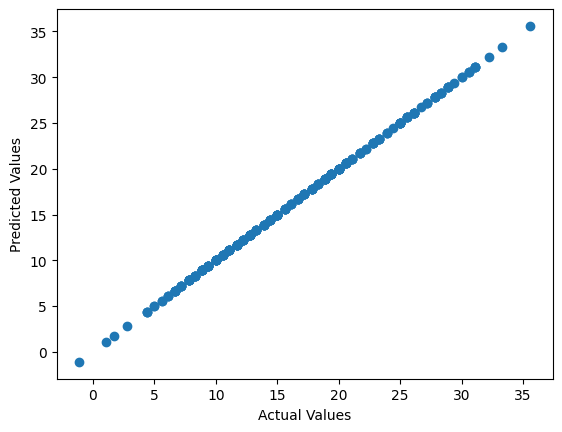

In [87]:
plt.scatter(y_test, y_pred_test)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

### "Real" prediction

När dessa steg ovan är gjorda så är det då dags för att faktiskt göra en "skarp" prediction.
När predictionen är gjord så skriver man ut resultatet för att se hur det gick och hur trovärdigt resultatet blev.

In [88]:
y_pred = model.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 6.829576722130997e-15
MSE: 6.883921995744125e-29
RMSE: 8.296940397365842e-15


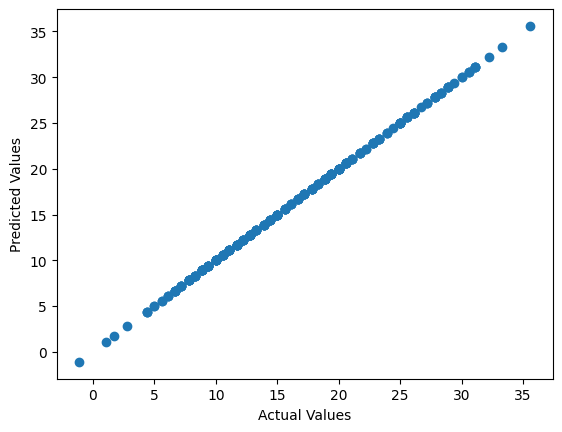

In [89]:

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()